In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def analyze_channel_schedule(file_path):
    # Load dataset
    df = pd.read_csv(file_path)

    # Rename 'Unnamed: 0' to 'Date-Time' if necessary
    if 'Unnamed: 0' in df.columns:
        df.rename(columns={'Unnamed: 0': 'Date-Time'}, inplace=True)

    # Convert 'Date-Time' to datetime format
    df['Date-Time'] = pd.to_datetime(df['Date-Time'], errors='coerce')

    # Display basic info
    print("\nFirst few rows of the dataset:")
    print(df.head())
    print("\nDataset information:")
    df.info()
    print("\nSummary statistics:")
    print(df.describe())
    print("\nMissing values per column:")
    print(df.isnull().sum())

    print(df[['children_baseline_view_count', 'adults_baseline_view_count', 'retirees_baseline_view_count']].isnull().sum())
    
    # Ensure proper datetime conversion
    df['Date-Time'] = pd.to_datetime(df['Date-Time'], errors='coerce')
    
    # Resample to daily averages (optional)
    df.set_index('Date-Time', inplace=True)
    df_daily = df.resample('D').mean()
    
    # Analyze view counts over time
    plt.figure(figsize=(12, 6))
    plt.plot(df_daily.index, df_daily['children_baseline_view_count'], label='Children Baseline View Count', color='skyblue', marker='o')
    plt.plot(df_daily.index, df_daily['adults_baseline_view_count'], label='Adults Baseline View Count', color='orange', marker='o')
    plt.plot(df_daily.index, df_daily['retirees_baseline_view_count'], label='Retirees Baseline View Count', color='green', marker='o')
    plt.title('Baseline View Counts Over Time (Daily Averages)')
    plt.xlabel('Date-Time')
    plt.ylabel('View Counts')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Prime time factor distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['prime_time_factor'], bins=10, kde=True, color='purple')
    plt.title('Distribution of Prime Time Factor')
    plt.xlabel('Prime Time Factor')
    plt.ylabel('Frequency')
    plt.show()

    # Correlation analysis
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    correlation_matrix = df[numeric_cols].corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    print("\nAnalysis Complete.")



First few rows of the dataset:
            Date-Time  children_baseline_view_count  \
0 2024-01-10 07:00:00                      0.020000   
1 2024-01-10 07:05:00                      0.019931   
2 2024-01-10 07:10:00                      0.019724   
3 2024-01-10 07:15:00                      0.019385   
4 2024-01-10 07:20:00                      0.018919   

   adults_baseline_view_count  retirees_baseline_view_count  prime_time_factor  
0                    0.022208                      0.003218                1.0  
1                    0.022218                      0.003367                1.0  
2                    0.022247                      0.003522                1.0  
3                    0.022295                      0.003684                1.0  
4                    0.022362                      0.003851                1.0  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17136 entries, 0 to 17135
Data columns (total 5 columns):
 #   Column          

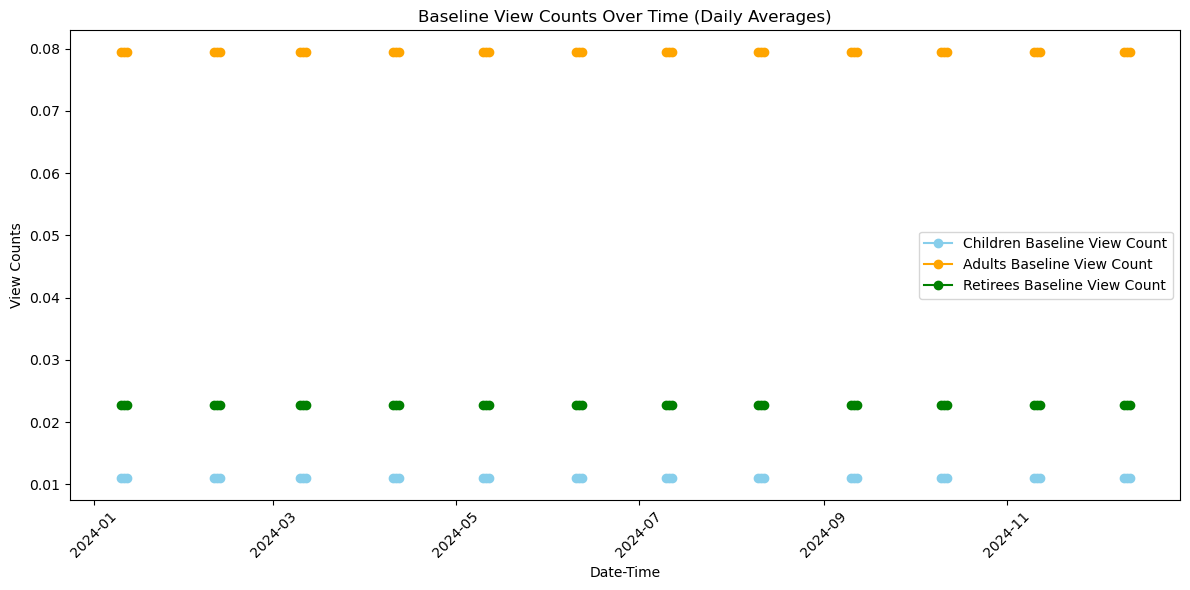

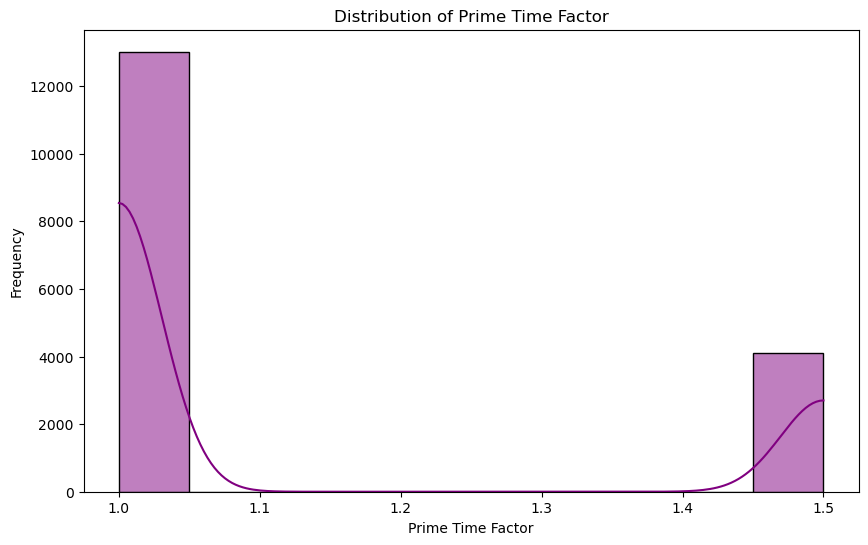

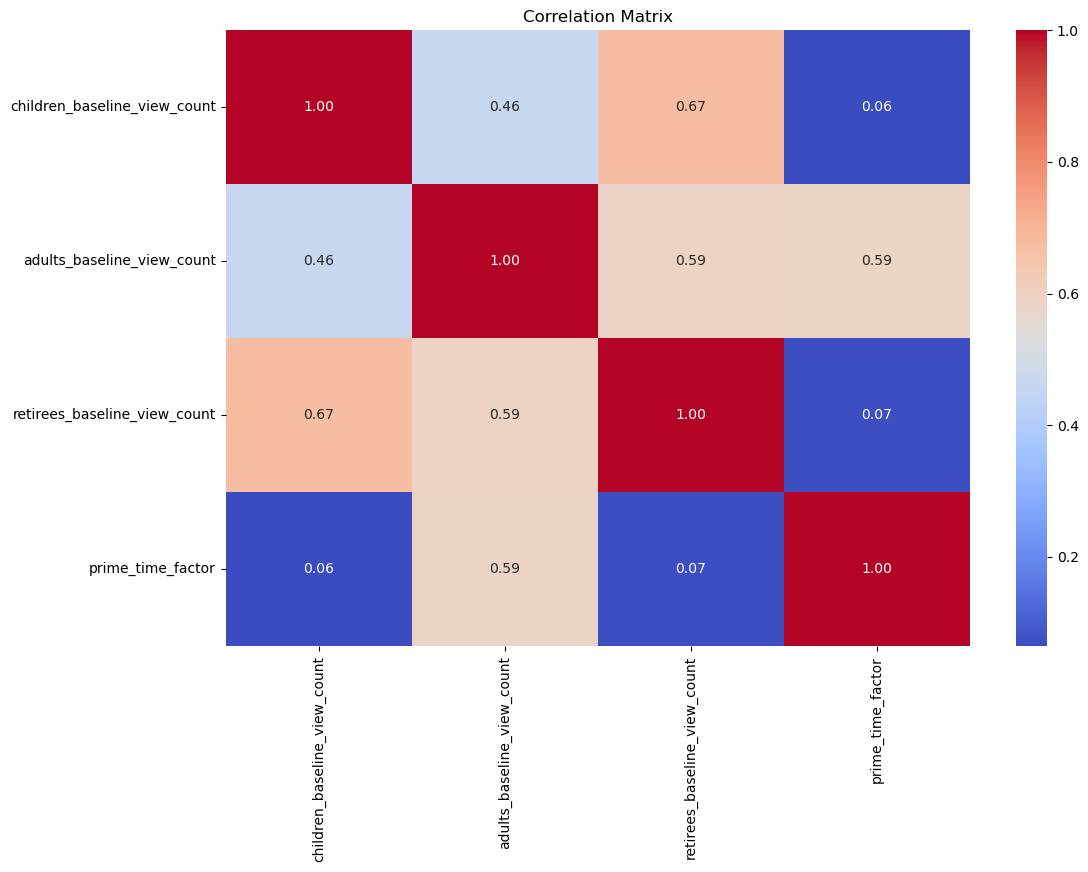


Analysis Complete.


In [11]:
analyze_channel_schedule("data/channel_A_schedule.csv")